# Feature Extraction: Corners

See //https://scikit-image.org/docs/stable/api/skimage.feature for a list of several skimage corner detectors. 

In [6]:
%matplotlib inline

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage.feature import canny
from skimage.feature import corner_harris, corner_peaks, corner_subpix
from skimage.util import img_as_float32 as img_as_float

In [2]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print('Data range:', np.min(I), 'to', np.max(I))

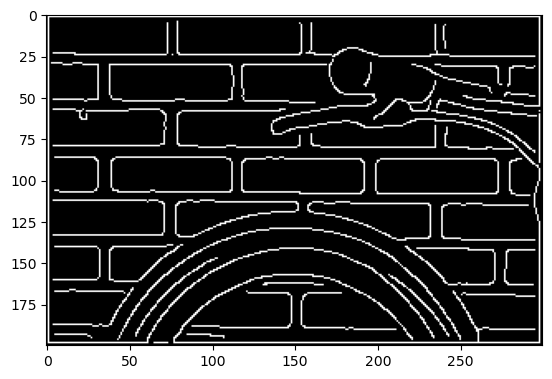

In [7]:
use_test = False

if use_test:
    I1 = io.imread("../../images/chess.png", as_gray=True)
    I1 = img_as_float(I1[0:200,0:200])
else:
    I1 = io.imread("../../images/bikes.jpg", as_gray=True)
    I1 = img_as_float(I1[75:275,200:500])
    I1 = canny(I1, sigma=2, low_threshold=0.10, high_threshold=0.20)

fig, ax = plt.subplots()
plt.imshow(I1, cmap='gray')
plt.show()

## Algorithm: Harris

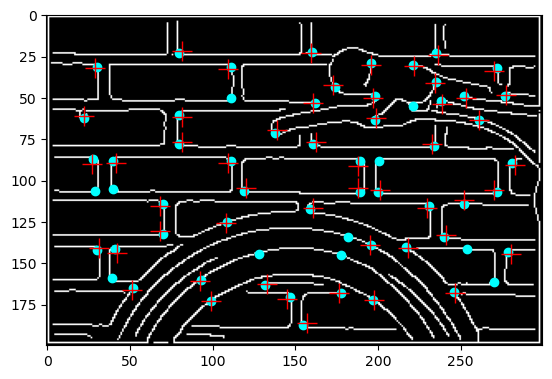

In [8]:
response = corner_harris(I1, method='k', k=0.05)

coords = corner_peaks(response, min_distance=10, threshold_rel=0.02, num_peaks=1000)
coords_subpix = corner_subpix(I1, coords, window_size=5, alpha=0.80)

fig, ax = plt.subplots()
ax.imshow(I1, cmap='gray')
ax.plot(coords[:,1], coords[:,0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:,1], coords_subpix[:,0], '+r', markersize=15)
plt.show()